
# 载入文档


In [51]:
# Load all abandonment chunks from the directory
import os
import xarray as xr


# === 1. 设置参数 ===
out_dir = r'D:\xarray\abandonment_chunk'
ca_chunk_lat_min, ca_chunk_lat_max = 0,111
ca_chunk_lon_min, ca_chunk_lon_max = 0,111 

# === 2. 加载加利福尼亚地区的chunks ===
all_chunks = []
for ci in range(ca_chunk_lat_min, ca_chunk_lat_max + 1):
    for cj in range(ca_chunk_lon_min, ca_chunk_lon_max + 1):
        path = os.path.join(out_dir, f'chunk_{ci}_{cj}.nc')
        # Skip specific chunks
        if path.endswith('chunk_20_46.nc') or path.endswith('chunk_20_51.nc') or path.endswith('chunk_5_56.nc') or path.endswith('chunk_6_79.nc'):
            continue
        if os.path.exists(path):
            all_chunks.append(path)
        
all_chunks


ds_all = xr.open_mfdataset(
    all_chunks
)

 # Calculate check_abandonment
ds_all['2022_abandonment'] = (
    (ds_all.abandonment_year + ds_all.abandonment_duration >= 2022)
).astype(int)




# 输出全球

C:\Users\isxzl\AppData\Local\Temp\ipykernel_20644\513091666.py:3: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  lat=int(ds_all.dims['lat']/1000),
C:\Users\isxzl\AppData\Local\Temp\ipykernel_20644\513091666.py:4: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  lon=int(ds_all.dims['lon']/1500),


<Axes: xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

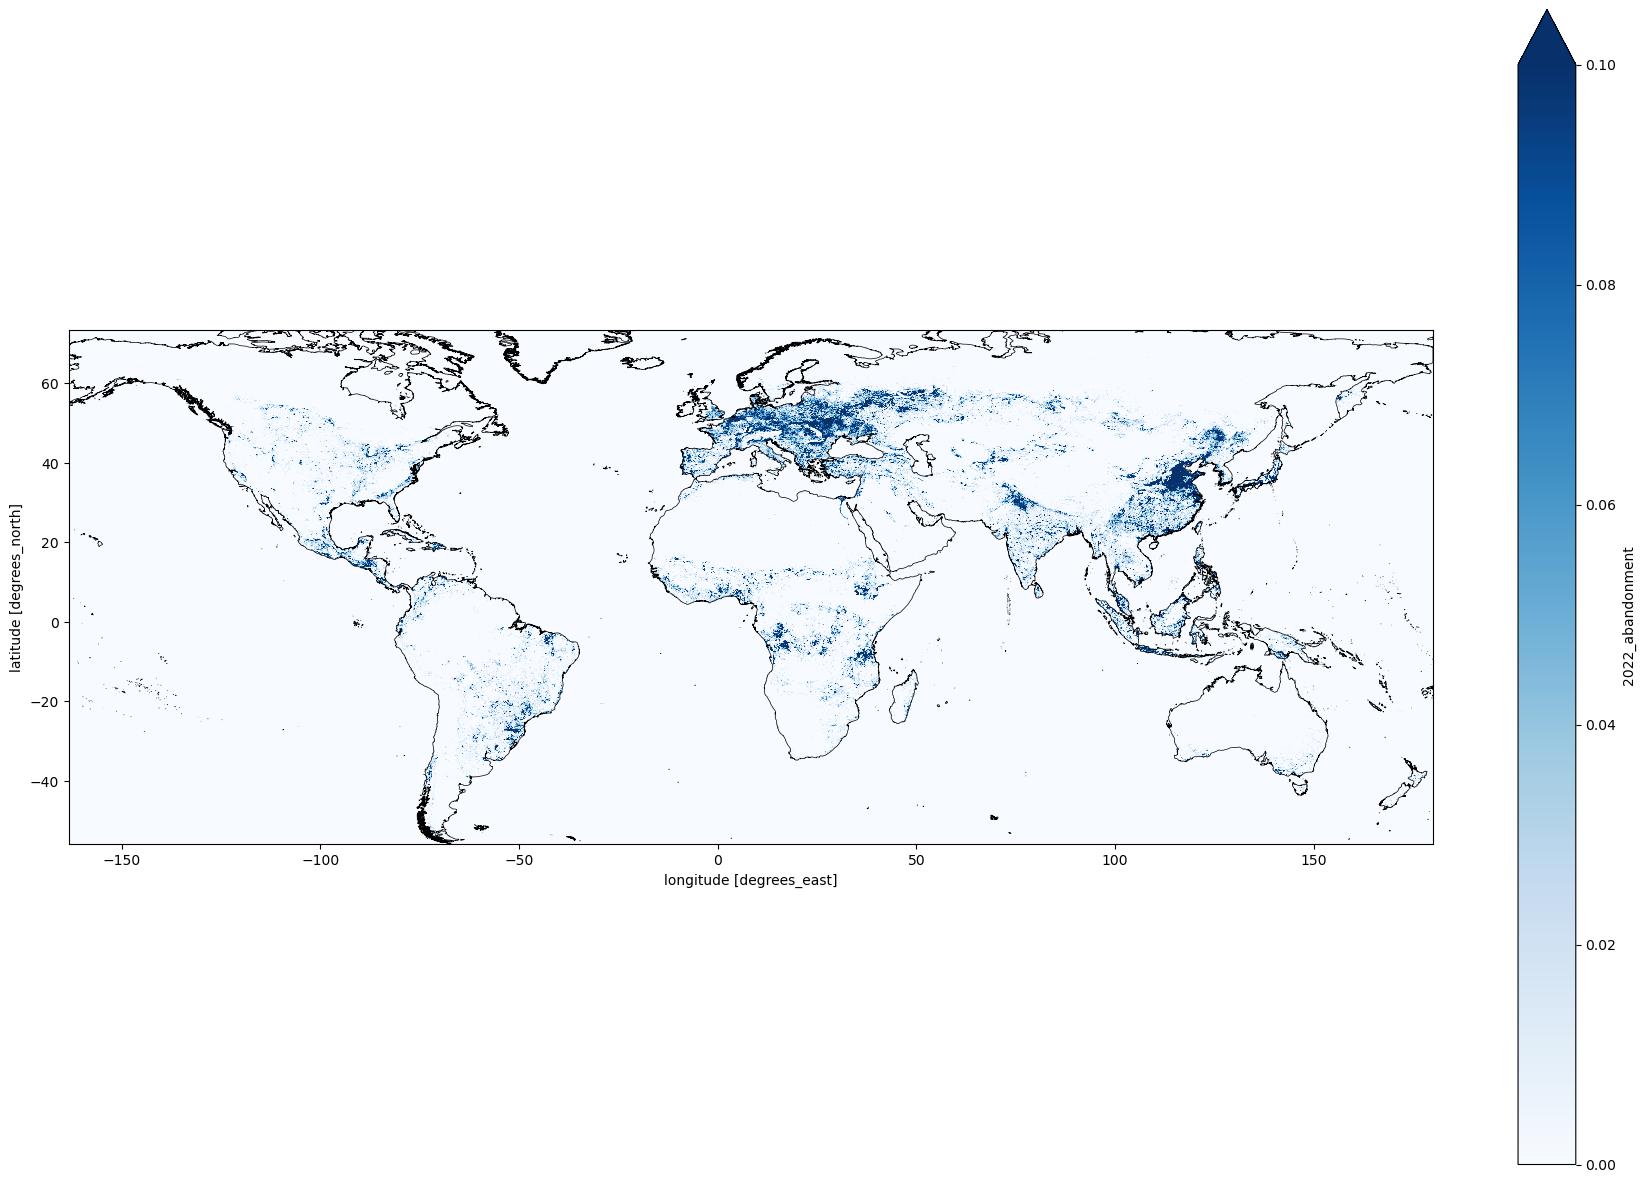

In [ ]:
# Coarsen the 2022_abandonment data to 500x750 grid using mean density
coarsened = ds_all['2022_abandonment'].coarsen(
    lat=int(ds_all.dims['lat']/1000), 
    lon=int(ds_all.dims['lon']/1500),
    boundary='trim'
).mean()
import geopandas as gpd
import matplotlib.pyplot as plt


world = gpd.read_file(r'world_shp/ne_10m_land.shp')#.to_crs('EPSG:4326')
fig, ax = plt.subplots(figsize=(22, 15))  # Increased figure size
coarsened.plot(cmap='Blues', vmin=0, vmax=0.1,ax=ax)
world.plot(ax=ax, color='none', edgecolor='black', linewidth=0.5)